In [2]:
!pip install package_name

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [4]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [5]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.08565882]
 [ 1.2339166 ]
 [-1.6809732 ]], shape=(3, 1), dtype=float32)


In [6]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.52849734]
 [0.04273903]
 [0.07981563]], shape=(3, 1), dtype=float32)


In [7]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

In [8]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.2078323],
       [ 0.785189 ],
       [-1.2851238]], dtype=float32)>


In [9]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [10]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [11]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [12]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

In [13]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [14]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [15]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [16]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [17]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [18]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

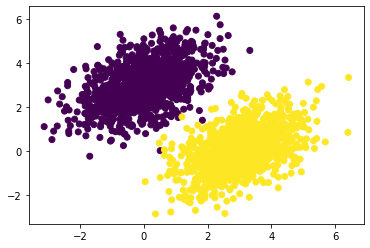

In [19]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [20]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [21]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [22]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [23]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [24]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.4424
Loss at step 1: 0.1439
Loss at step 2: 0.0961
Loss at step 3: 0.0847
Loss at step 4: 0.0790
Loss at step 5: 0.0745
Loss at step 6: 0.0705
Loss at step 7: 0.0668
Loss at step 8: 0.0634
Loss at step 9: 0.0603
Loss at step 10: 0.0574
Loss at step 11: 0.0548
Loss at step 12: 0.0524
Loss at step 13: 0.0501
Loss at step 14: 0.0481
Loss at step 15: 0.0462
Loss at step 16: 0.0445
Loss at step 17: 0.0429
Loss at step 18: 0.0415
Loss at step 19: 0.0402
Loss at step 20: 0.0389
Loss at step 21: 0.0378
Loss at step 22: 0.0368
Loss at step 23: 0.0358
Loss at step 24: 0.0350
Loss at step 25: 0.0342
Loss at step 26: 0.0334
Loss at step 27: 0.0327
Loss at step 28: 0.0321
Loss at step 29: 0.0316
Loss at step 30: 0.0310
Loss at step 31: 0.0306
Loss at step 32: 0.0301
Loss at step 33: 0.0297
Loss at step 34: 0.0293
Loss at step 35: 0.0290
Loss at step 36: 0.0287
Loss at step 37: 0.0284
Loss at step 38: 0.0281
Loss at step 39: 0.0279


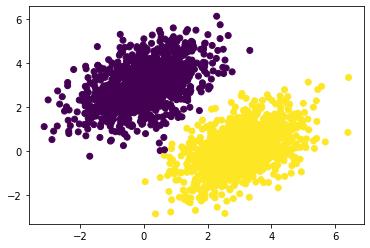

In [25]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

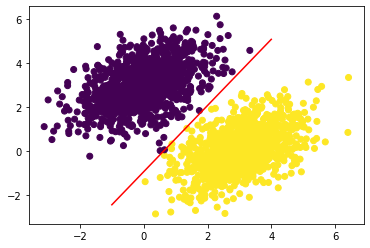

In [26]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

In [27]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [28]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [29]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [30]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [31]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

In [32]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [33]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [34]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 1s 2ms/step - loss: 14.0118 - binary_accuracy: 0.0925
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 13.5687 - binary_accuracy: 0.0935
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 13.1880 - binary_accuracy: 0.0965
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 12.8255 - binary_accuracy: 0.0990
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 12.4677 - binary_accuracy: 0.1010


In [35]:
history.history

{'loss': [14.011835098266602,
  13.568729400634766,
  13.1880464553833,
  12.82548999786377,
  12.467703819274902],
 'binary_accuracy': [0.0925000011920929,
  0.09350000321865082,
  0.09650000184774399,
  0.0989999994635582,
  0.10100000351667404]}

In [36]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 4ms/step - loss: 0.5379 - binary_accuracy: 0.8421 - val_loss: 0.0329 - val_binary_accuracy: 0.9983
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0798 - binary_accuracy: 0.9479 - val_loss: 0.0372 - val_binary_accuracy: 0.9967
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0686 - binary_accuracy: 0.9643 - val_loss: 0.1536 - val_binary_accuracy: 0.7550
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0739 - binary_accuracy: 0.9543 - val_loss: 0.3704 - val_binary_accuracy: 0.6400
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0741 - binary_accuracy: 0.9579 - val_loss: 0.0340 - val_binary_accuracy: 0.9983


In [37]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[-0.12104625]
 [ 0.29266256]
 [ 1.1449625 ]
 [ 0.72991097]
 [-0.1364674 ]
 [ 0.596059  ]
 [-0.23598891]
 [-0.03250045]
 [-0.22726059]
 [ 0.27486557]]
